In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [3]:
df = pd .read_csv("players_21.csv")

In [4]:
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Columns: 106 entries, sofifa_id to rb
dtypes: float64(18), int64(44), object(44)
memory usage: 15.3+ MB


In [6]:
df.describe()

,sofifa_id,age,height_cm,weight_kg,league_rank,overall,potential,value_eur,wage_eur,international_reputation,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18944.000000,18944.000000,18944.000000,18944.000000,18719.000000,18944.000000,18944.000000,1.894400e+04,18944.000000,18944.000000,...,18944.000000,18944.000000,0.0,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000
mean,226242.402872,25.225823,181.190773,75.016892,1.357070,65.677787,71.086729,2.224813e+06,8675.852513,1.091850,...,48.050412,57.978674,NaN,47.581767,45.546505,16.446052,16.236486,16.103357,16.225982,16.551309
std,27171.091056,4.697354,6.825672,7.057140,0.739327,7.002278,6.109985,5.102486e+06,19654.774894,0.361841,...,15.671721,12.118390,NaN,21.402461,20.953997,17.577332,16.845480,16.519399,17.017341,17.878121
min,41.000000,16.000000,155.000000,50.000000,1.000000,47.000000,47.000000,0.000000e+00,0.000000,1.000000,...,6.000000,12.000000,NaN,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,210030.500000,21.000000,176.000000,70.000000,1.000000,61.000000,67.000000,3.000000e+05,1000.000000,1.000000,...,38.750000,50.000000,NaN,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,232314.500000,25.000000,181.000000,75.000000,1.000000,66.000000,71.000000,6.500000e+05,3000.000000,1.000000,...,49.000000,59.000000,NaN,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,246760.250000,29.000000,186.000000,80.000000,1.000000,70.000000,75.000000,1.800000e+06,7000.000000,1.000000,...,60.000000,66.000000,NaN,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,258970.000000,53.000000,206.000000,110.000000,4.000000,93.000000,95.000000,1.055000e+08,560000.000000,5.000000,...,92.000000,96.000000,NaN,93.000000,90.000000,90.000000,92.000000,93.000000,91.000000,90.000000


In [7]:
df.shape

(18944, 106)

In [8]:
print("\nColumn Names:\n", df.columns.tolist())


Column Names:
 ['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club_name', 'league_name', 'league_rank', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reaction

In [9]:
df.isnull().sum().sort_values(ascending=False).head(10)

defending_marking       18944
loaned_from             18186
nation_jersey_number    17817
nation_position         17817
player_tags             17536
gk_speed                16861
gk_kicking              16861
gk_handling             16861
gk_diving               16861
gk_positioning          16861
dtype: int64

In [10]:
df["High_Performer"] = 0
df.loc[df["overall"] >= 80, "High_Performer"] = 1

df["High_Performer"].value_counts()

High_Performer
0    18441
1      503
Name: count, dtype: int64

In [11]:
features = ['pace', 'shooting', 'passing', 'dribbling','defending', 'physic', 'age', 'height_cm', 'weight_kg',
            'skill_moves', 'international_reputation', 'weak_foot']


In [12]:
df_model = df[features + ["High_Performer"]].dropna()

In [13]:
df_model.shape

(16861, 13)

In [14]:
"Data shape after cleaning:", df_model.shape

('Data shape after cleaning:', (16861, 13))

In [15]:
df_model.head()

,pace,shooting,passing,dribbling,defending,physic,age,height_cm,weight_kg,skill_moves,international_reputation,weak_foot,High_Performer
0,85.0,92.0,91.0,95.0,38.0,65.0,33,170,72,4,5,4,1
1,89.0,93.0,81.0,89.0,35.0,77.0,35,187,83,5,5,4,1
3,78.0,91.0,78.0,85.0,43.0,82.0,31,184,80,4,4,4,1
4,91.0,85.0,86.0,94.0,36.0,59.0,28,175,68,5,5,5,1
5,76.0,86.0,93.0,88.0,64.0,78.0,29,181,70,4,4,5,1


In [16]:
df_model.columns

Index(['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'age', 'height_cm', 'weight_kg', 'skill_moves',
       'international_reputation', 'weak_foot', 'High_Performer'],
      dtype='object')

In [17]:
X = df_model[['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic','age', 'height_cm', 'weight_kg', 
             'skill_moves','international_reputation', 'weak_foot']]
y = df_model['High_Performer']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
"Training data:", X_train.shape


('Training data:', (13488, 12))

In [20]:
"Testing data:", X_test.shape

('Testing data:', (3373, 12))

In [21]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [1]:
model.fit(X_train, y_train)

NameError: name 'model' is not defined

In [57]:
y_predictions = model.predict(X_test)

In [63]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_predictions))


Confusion Matrix:
 [[3271    5]
 [  28   69]]


In [66]:
print("\nClassification Report:\n", classification_report(y_test, y_predictions))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3276
           1       0.93      0.71      0.81        97

    accuracy                           0.99      3373
   macro avg       0.96      0.85      0.90      3373
weighted avg       0.99      0.99      0.99      3373



In [67]:
print("\nAccuracy Score", accuracy_score(y_test, y_predictions))


Accuracy Score 0.9902164245478803


In [73]:
importance_features = model.feature_importances_

In [75]:
feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance":  importance_features
}).sort_values(by="Importance", ascending=False)

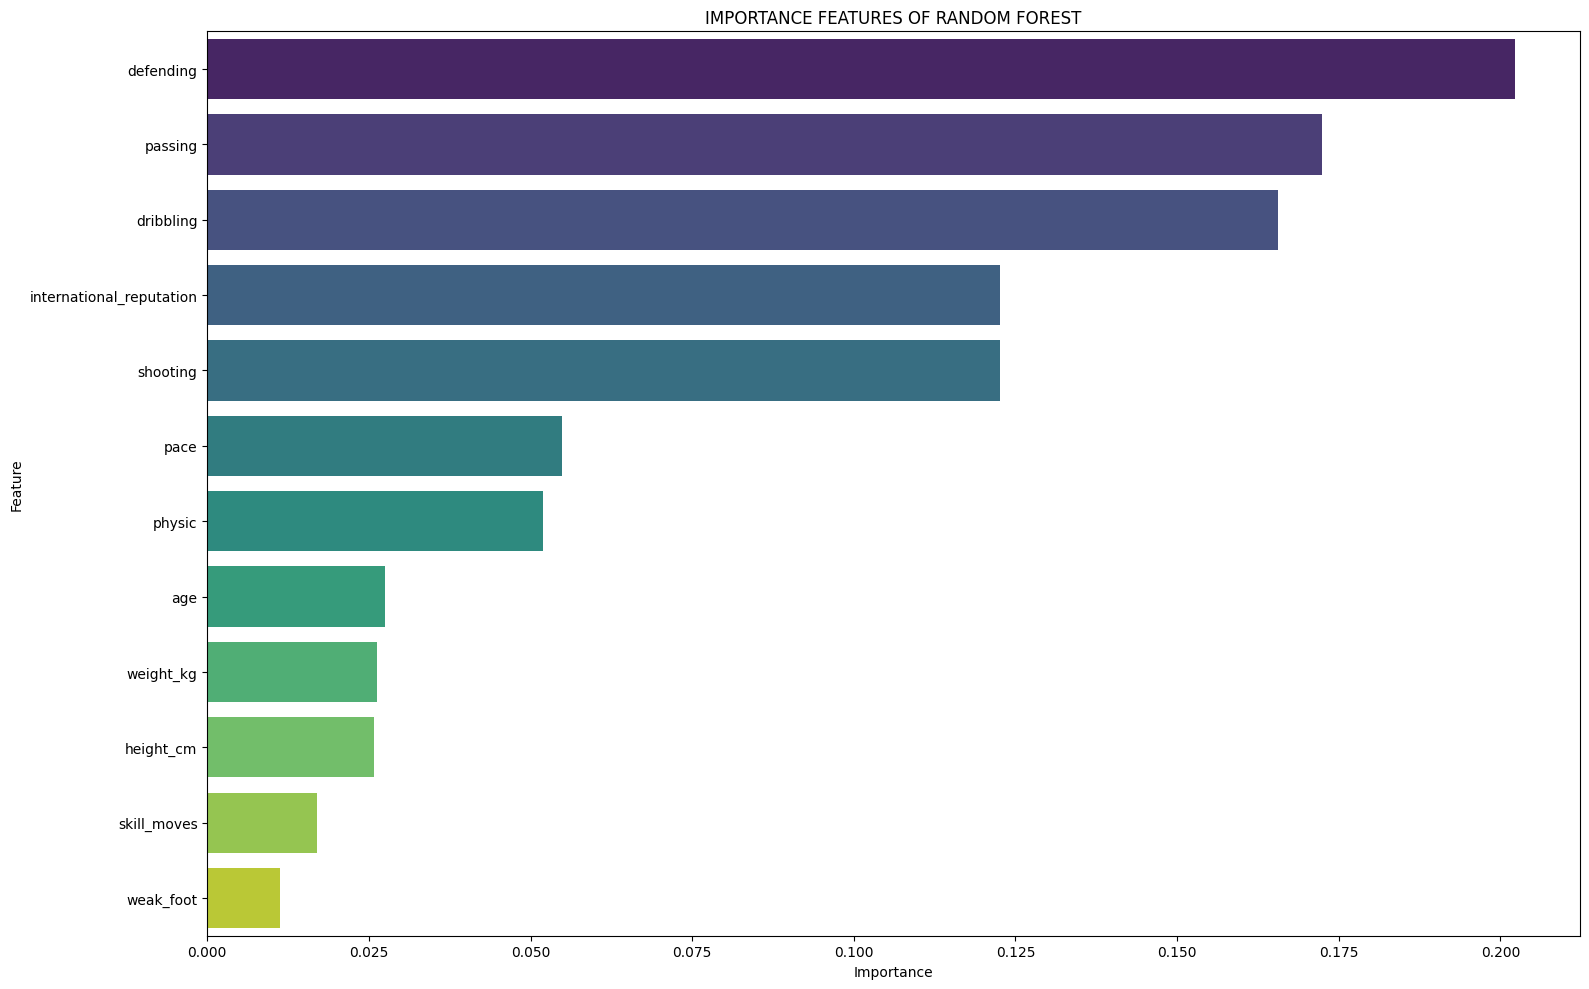

In [80]:
plt.figure(figsize=(16,10))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")
plt.title("IMPORTANCE FEATURES OF RANDOM FOREST")
plt.tight_layout()

In [87]:
# Round correlation values to 2 decimals
rounded_corr = corr_matrix.round(2)


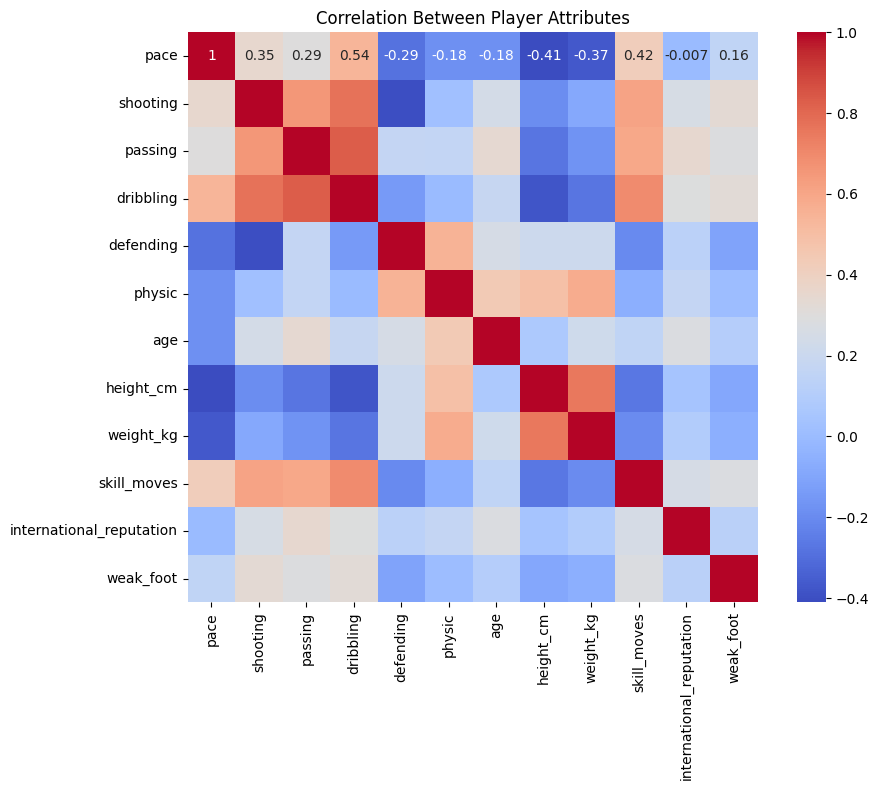

In [92]:
# Calculate correlation matrix
corr_matrix = X.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',square=True)
plt.title('Correlation Between Player Attributes')
plt.tight_layout()
plt.show()

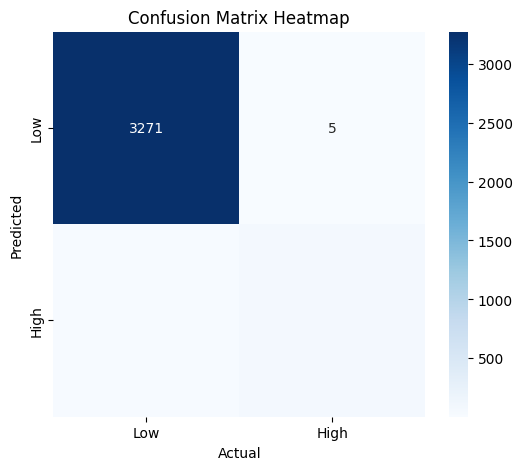

In [110]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_predictions)


plt.figure(figsize=(6, 5))

sns.heatmap(cm, annot=True, fmt='d', xticklabels=["Low","High"], yticklabels=["Low", "High"], cmap="Blues")

plt.title('Confusion Matrix Heatmap')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()